# Task 5 – Analysis of distributed data sources
## 5.1 Data Initialization + Exploration

Load dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as bayes
from sklearn.feature_extraction.text import CountVectorizer as countvec
from sklearn.metrics import accuracy_score as accuracy
from sklearn.ensemble import RandomForestClassifier 

**Task 5.1.1**: Import pickled data from 'data/twitterData.pkl' and show its shape.

In [2]:
import pickle
#alternativ read_csv()
with open('data/twitterData.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data.head()

screen_name              name  \
0       DatZerooo             David   
0         reap705       Oliver Gast   
0     Dossary1995  Khalid Aldossary   
0         eduUu06             eduUu   
0  Narutofreak935           Avengar   

                                 tweets_concatenated  \
0  Warum riecht mein Bruder nach Pizza wenn er ei...   
0  [CSS] Ein Off-canvas-Menü mit Dropdown-Navigat...   
0                                                      
0  heut abend kogge und morgen endlich haare ab :...   
0  @GrandlineTV gib nicht auf und mach dein Ding ...   

                                          avatar_url gender   age  
0  http://pbs.twimg.com/profile_images/7569661512...      M  16.0  
0  http://pbs.twimg.com/profile_images/1366984169...      M  15.0  
0  http://pbs.twimg.com/profile_images/4167523242...      M  37.0  
0  http://pbs.twimg.com/profile_images/896480580/...      M  46.0  
0  http://pbs.twimg.com/profile_images/7317971734...      F  19.0

In [4]:
data.reset_index(inplace=True, drop=True)

In [5]:
data

screen_name              name  \
0          DatZerooo             David   
1            reap705       Oliver Gast   
2        Dossary1995  Khalid Aldossary   
3            eduUu06             eduUu   
4     Narutofreak935           Avengar   
...              ...               ...   
2911       ndean1999  Nordin Steinbach   
2912     annieavena3             Annie   
2913  GruesomeGrinch          DaGrinch   
2914   MarieStreusel         ماري لويز   
2915     misseslulu1        misseslulu   

                                    tweets_concatenated  \
0     Warum riecht mein Bruder nach Pizza wenn er ei...   
1     [CSS] Ein Off-canvas-Menü mit Dropdown-Navigat...   
2                                                         
3     heut abend kogge und morgen endlich haare ab :...   
4     @GrandlineTV gib nicht auf und mach dein Ding ...   
...                                                 ...   
2911  @foxdeutschland ich will mehr Fimzitate!!!🤓||@...   
2912                                                      
2913                                                      
2914  Ist das euer Ernst ? Erst sorgt ihr für @_Deen...   
2915  RT @AxelStein8: Auch Kinderlose sollen Opfer b...   

                                             avatar_url gender   age  
0     http://pbs.twimg.com/profile_images/7569661512...      M  16.0  
1     http://pbs.twimg.com/profile_images/1366984169...      M  15.0  
2     http://pbs.twimg.com/profile_images/4167523242...      M  37.0  
3     http://pbs.twimg.com/profile_images/896480580/...      M  46.0  
4     http://pbs.twimg.com/profile_images/7317971734...      F  19.0  
...                                                 ...    ...   ...  
2911  http://pbs.twimg.com/profile_images/6731336886...      F   NaN  
2912  http://pbs.twimg.com/profile_images/7400980836...      F   NaN  
2913  http://pbs.twimg.com/profile_images/7709043955...      M   NaN  
2914  http://pbs.twimg.com/profile_images/7725442278...      F   NaN  
2915  http://pbs.twimg.com/profile_images/7604332038...      F   NaN  

[2916 rows x 6 columns]

In [6]:
data.describe()

age
count  1309.000000
mean     22.934301
std      12.130104
min       3.000000
25%      16.000000
50%      19.000000
75%      25.000000
max      82.000000

**Task 5.1.2**: Output some elements of the data set. What do you observe? Are there users without tweets? Check it.

In [7]:
data.loc[0]

screen_name                                                    DatZerooo
name                                                               David
tweets_concatenated    Warum riecht mein Bruder nach Pizza wenn er ei...
avatar_url             http://pbs.twimg.com/profile_images/7569661512...
gender                                                                 M
age                                                                   16
Name: 0, dtype: object

In [8]:
from IPython.display import HTML
for col in data.columns:
    print(str(col)+": ")
    print(str(data.at[0,str(col)]))
    print()

screen_name: 
DatZerooo

name: 
David

tweets_concatenated: 
Warum riecht mein Bruder nach Pizza wenn er eine gegessen hat ohne mir was abzugeben ist er für mich gestorben||Das Problem so schneller als das Licht zu laufen ist aus Versehen in die Dunkelheit zu laufen.||Der Moment wenn du was hoffst aber es 50/50 steht und du mega enttäuscht wenn es nicht passiert||Warum bin ich eigentlich nachts/morgens aktiver als am tag||@DatZerooo ok war ne schlechte idee nachts sind nur retards on||Bin müde will aber ne Runde LoL spielen. rip||Ich warte grade bis n Kumpel on kommt und wir dann zu dritt Pokemon hunten können..... Mein Leben ist erfüllt||DIR FOLGT FUCKING @TANZVERBOTcf ich hoffe du fühlst dich geehrt @drownedhumor||ratet mal wer bis grade eben noch draußen pokemon go gespielt hab||Ein Kumpel von mir, kommt aus Hamburg endlich mal wieder nach Schwerin||@DatZerooo Das Gefühl wenn das Haustier Fotogener als man selbst ist.||Warte grade seit 2 Stunden auf einen Kumpel. Er wollte KURZ dusc

**Task 5.1.3**: Now remove the users without tweets.

In [9]:
data

screen_name              name  \
0          DatZerooo             David   
1            reap705       Oliver Gast   
2        Dossary1995  Khalid Aldossary   
3            eduUu06             eduUu   
4     Narutofreak935           Avengar   
...              ...               ...   
2911       ndean1999  Nordin Steinbach   
2912     annieavena3             Annie   
2913  GruesomeGrinch          DaGrinch   
2914   MarieStreusel         ماري لويز   
2915     misseslulu1        misseslulu   

                                    tweets_concatenated  \
0     Warum riecht mein Bruder nach Pizza wenn er ei...   
1     [CSS] Ein Off-canvas-Menü mit Dropdown-Navigat...   
2                                                         
3     heut abend kogge und morgen endlich haare ab :...   
4     @GrandlineTV gib nicht auf und mach dein Ding ...   
...                                                 ...   
2911  @foxdeutschland ich will mehr Fimzitate!!!🤓||@...   
2912                                                      
2913                                                      
2914  Ist das euer Ernst ? Erst sorgt ihr für @_Deen...   
2915  RT @AxelStein8: Auch Kinderlose sollen Opfer b...   

                                             avatar_url gender   age  
0     http://pbs.twimg.com/profile_images/7569661512...      M  16.0  
1     http://pbs.twimg.com/profile_images/1366984169...      M  15.0  
2     http://pbs.twimg.com/profile_images/4167523242...      M  37.0  
3     http://pbs.twimg.com/profile_images/896480580/...      M  46.0  
4     http://pbs.twimg.com/profile_images/7317971734...      F  19.0  
...                                                 ...    ...   ...  
2911  http://pbs.twimg.com/profile_images/6731336886...      F   NaN  
2912  http://pbs.twimg.com/profile_images/7400980836...      F   NaN  
2913  http://pbs.twimg.com/profile_images/7709043955...      M   NaN  
2914  http://pbs.twimg.com/profile_images/7725442278...      F   NaN  
2915  http://pbs.twimg.com/profile_images/7604332038...      F   NaN  

[2916 rows x 6 columns]

In [10]:
data = data[data['tweets_concatenated'] !='']

In [11]:
data

screen_name              name  \
0          DatZerooo             David   
1            reap705       Oliver Gast   
3            eduUu06             eduUu   
4     Narutofreak935           Avengar   
5        miley_sarah             Sarah   
...              ...               ...   
2908  rauscher_frank    Frank Rauscher   
2910     levithanius       levithanius   
2911       ndean1999  Nordin Steinbach   
2914   MarieStreusel         ماري لويز   
2915     misseslulu1        misseslulu   

                                    tweets_concatenated  \
0     Warum riecht mein Bruder nach Pizza wenn er ei...   
1     [CSS] Ein Off-canvas-Menü mit Dropdown-Navigat...   
3     heut abend kogge und morgen endlich haare ab :...   
4     @GrandlineTV gib nicht auf und mach dein Ding ...   
5     RT @bomelino: Das "Backe, backe Kuchen"-Lied i...   
...                                                 ...   
2908  War da was am 9.06.2006? https://t.co/lHXk8ndF...   
2910  Internet funktioniert wieder und das Wochenend...   
2911  @foxdeutschland ich will mehr Fimzitate!!!🤓||@...   
2914  Ist das euer Ernst ? Erst sorgt ihr für @_Deen...   
2915  RT @AxelStein8: Auch Kinderlose sollen Opfer b...   

                                             avatar_url gender   age  
0     http://pbs.twimg.com/profile_images/7569661512...      M  16.0  
1     http://pbs.twimg.com/profile_images/1366984169...      M  15.0  
3     http://pbs.twimg.com/profile_images/896480580/...      M  46.0  
4     http://pbs.twimg.com/profile_images/7317971734...      F  19.0  
5     http://pbs.twimg.com/profile_images/7584397626...      M  18.0  
...                                                 ...    ...   ...  
2908  http://pbs.twimg.com/profile_images/5753275327...      M   NaN  
2910  http://pbs.twimg.com/profile_images/1808105222...      M   NaN  
2911  http://pbs.twimg.com/profile_images/6731336886...      F   NaN  
2914  http://pbs.twimg.com/profile_images/7725442278...      F   NaN  
2915  http://pbs.twimg.com/profile_images/7604332038...      F   NaN  

[2486 rows x 6 columns]

**Task 5.1.4**: Insert an additional feature `gender_class` by replacing: 0 = F and 1 = M..

In [12]:
data['gender_class'] = data['gender'].replace({'F':0, 'M':1})

<ipython-input-12-912c1372f295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender_class'] = data['gender'].replace({'F':0, 'M':1})


In [13]:
data.head()

screen_name         name  \
0       DatZerooo        David   
1         reap705  Oliver Gast   
3         eduUu06        eduUu   
4  Narutofreak935      Avengar   
5     miley_sarah        Sarah   

                                 tweets_concatenated  \
0  Warum riecht mein Bruder nach Pizza wenn er ei...   
1  [CSS] Ein Off-canvas-Menü mit Dropdown-Navigat...   
3  heut abend kogge und morgen endlich haare ab :...   
4  @GrandlineTV gib nicht auf und mach dein Ding ...   
5  RT @bomelino: Das "Backe, backe Kuchen"-Lied i...   

                                          avatar_url gender   age  \
0  http://pbs.twimg.com/profile_images/7569661512...      M  16.0   
1  http://pbs.twimg.com/profile_images/1366984169...      M  15.0   
3  http://pbs.twimg.com/profile_images/896480580/...      M  46.0   
4  http://pbs.twimg.com/profile_images/7317971734...      F  19.0   
5  http://pbs.twimg.com/profile_images/7584397626...      M  18.0   

   gender_class  
0             1  
1             1  
3             1  
4             0  
5             1

**Task 5.1.5**: There are two target attributes in our data set (gender and age). Analyze the distribution of our observation along those attributes.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

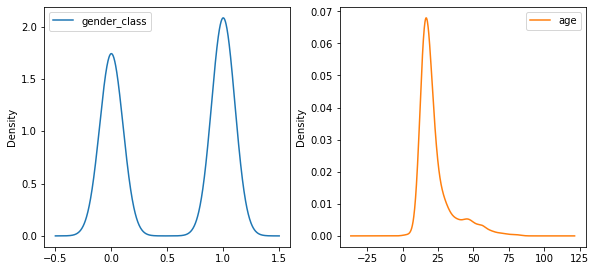

In [14]:
data[['gender_class','age']].plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))

**Task 5.1.6**: Plot the distribution of the gender attribute.

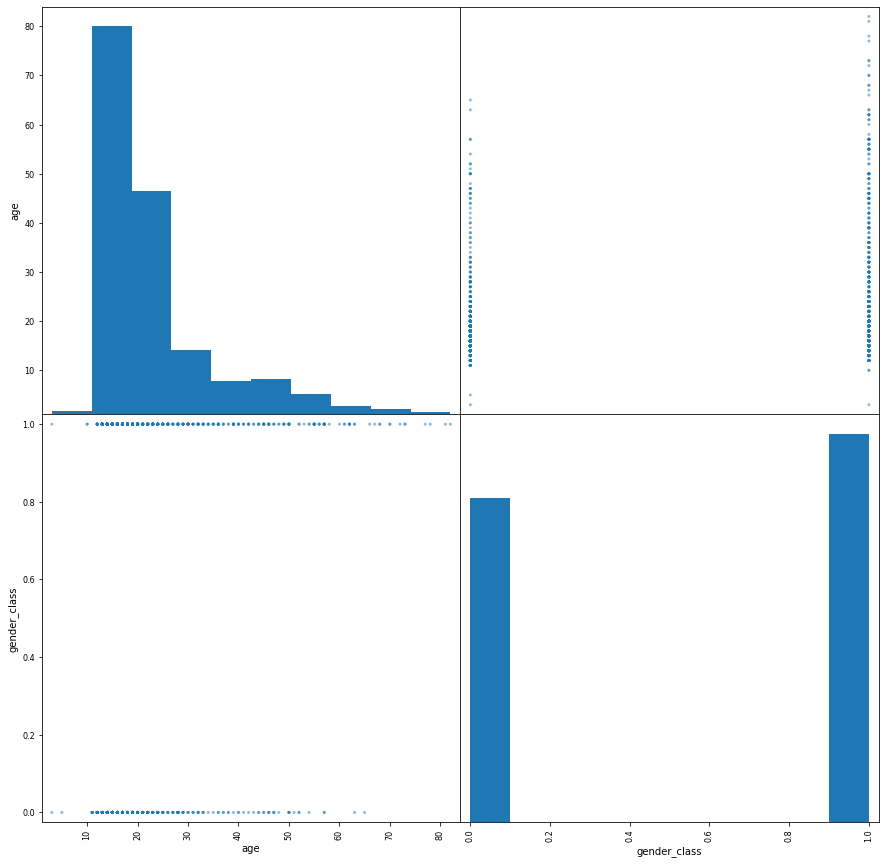

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[['age','gender_class']] ,figsize=(15,15))
plt.show()

**Task 5.1.7**: Plot the distribution of the age data set along the following segments: 0-10, 10-20, 20-30 and 30+

*Note: use [pandas.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)*

In [16]:
data

screen_name              name  \
0          DatZerooo             David   
1            reap705       Oliver Gast   
3            eduUu06             eduUu   
4     Narutofreak935           Avengar   
5        miley_sarah             Sarah   
...              ...               ...   
2908  rauscher_frank    Frank Rauscher   
2910     levithanius       levithanius   
2911       ndean1999  Nordin Steinbach   
2914   MarieStreusel         ماري لويز   
2915     misseslulu1        misseslulu   

                                    tweets_concatenated  \
0     Warum riecht mein Bruder nach Pizza wenn er ei...   
1     [CSS] Ein Off-canvas-Menü mit Dropdown-Navigat...   
3     heut abend kogge und morgen endlich haare ab :...   
4     @GrandlineTV gib nicht auf und mach dein Ding ...   
5     RT @bomelino: Das "Backe, backe Kuchen"-Lied i...   
...                                                 ...   
2908  War da was am 9.06.2006? https://t.co/lHXk8ndF...   
2910  Internet funktioniert wieder und das Wochenend...   
2911  @foxdeutschland ich will mehr Fimzitate!!!🤓||@...   
2914  Ist das euer Ernst ? Erst sorgt ihr für @_Deen...   
2915  RT @AxelStein8: Auch Kinderlose sollen Opfer b...   

                                             avatar_url gender   age  \
0     http://pbs.twimg.com/profile_images/7569661512...      M  16.0   
1     http://pbs.twimg.com/profile_images/1366984169...      M  15.0   
3     http://pbs.twimg.com/profile_images/896480580/...      M  46.0   
4     http://pbs.twimg.com/profile_images/7317971734...      F  19.0   
5     http://pbs.twimg.com/profile_images/7584397626...      M  18.0   
...                                                 ...    ...   ...   
2908  http://pbs.twimg.com/profile_images/5753275327...      M   NaN   
2910  http://pbs.twimg.com/profile_images/1808105222...      M   NaN   
2911  http://pbs.twimg.com/profile_images/6731336886...      F   NaN   
2914  http://pbs.twimg.com/profile_images/7725442278...      F   NaN   
2915  http://pbs.twimg.com/profile_images/7604332038...      F   NaN   

      gender_class  
0                1  
1                1  
3                1  
4                0  
5                1  
...            ...  
2908             1  
2910             1  
2911             0  
2914             0  
2915             0  

[2486 rows x 7 columns]

In [17]:
data = data.dropna()
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30),(30,data['age'].max())])
data['age_distribution']=pd.cut(data['age'],bins=bins, labels=['0-10','10-20','20-30','30+'])

<ipython-input-17-633d619c3551>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_distribution']=pd.cut(data['age'],bins=bins, labels=['0-10','10-20','20-30','30+'])


In [18]:
data['age_distribution']

0       (10.0, 20.0]
1       (10.0, 20.0]
3       (30.0, 82.0]
4       (10.0, 20.0]
5       (10.0, 20.0]
            ...     
1303    (10.0, 20.0]
1304    (30.0, 82.0]
1305    (10.0, 20.0]
1307    (30.0, 82.0]
1309    (10.0, 20.0]
Name: age_distribution, Length: 1137, dtype: category
Categories (4, interval[float64]): [(0.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 82.0]]

(array([567., 417.,  99.,  42.,  12.]),
 array([ 3. , 18.8, 34.6, 50.4, 66.2, 82. ]),
 <BarContainer object of 5 artists>)

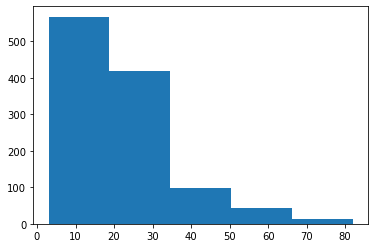

In [19]:
from matplotlib.pyplot import hist
hist(data['age'], bins=5)

In [20]:
data.groupby('age_distribution').count()

screen_name  name  tweets_concatenated  avatar_url  gender  \
age_distribution                                                               
(0.0, 10.0]                 5     5                    5           5       5   
(10.0, 20.0]              707   707                  707         707     707   
(20.0, 30.0]              238   238                  238         238     238   
(30.0, 82.0]              187   187                  187         187     187   

                  age  gender_class  
age_distribution                     
(0.0, 10.0]         5             5  
(10.0, 20.0]      707           707  
(20.0, 30.0]      238           238  
(30.0, 82.0]      187           187

(array([  3., 640., 293., 201.]),
 array([ 0., 10., 20., 30., 82.]),
 <BarContainer object of 4 artists>)

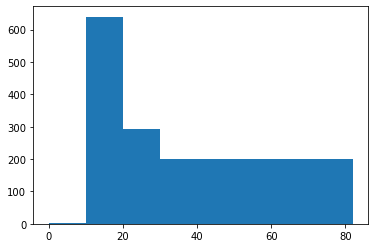

In [21]:
plt.hist(data['age'], bins=[0, 10, 20, 30, data['age'].max()])

## 5.2 Tweet analysis

Our main goal is to train multiple classifiers that can later be combined, based on the user's tweets and their name. However, a multi-step learning model requires three splits on the data: a sub training set, a meta training set and a test set. 

**Task 5.2.1**: Split the data into two trainings (trainSub, trainMeta) and one test set (test).

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Zwei Splits

X_trainSub, X_test = train_test_split(data, test_size=0.35, random_state=42)

In [24]:
X_trainMeta, X_test = train_test_split(X_test, test_size=0.5, random_state=42)

In [25]:
X_trainSub.head()

screen_name           name  \
114    EinfachChriss   EinfachChris   
106      KrazyJeyJey  Jenny Slimani   
482    jonaskiefer92   Jonas Kiefer   
1293  MdnghtStruggle  fly robin fly   
360         Viviii_S   Vivien Bosse   

                                    tweets_concatenated  \
114   @DnerTV kann man irgendwie mitmachen bei einem...   
106   RT @SamiSlimani: FROHE OSTERN! &amp; Guten Mor...   
482   @VL_Das1 es heißt verbotene liebe da weiß man ...   
1293  Kann nicht einschlafen hmpf||RT @iamblackbear:...   
360   :) Venedig und Italien :D sehr schön||@NNiise ...   

                                             avatar_url gender   age  \
114   http://pbs.twimg.com/profile_images/6871935884...      M  18.0   
106   http://pbs.twimg.com/profile_images/4412144574...      F  14.0   
482   http://pbs.twimg.com/profile_images/1633752789...      M  19.0   
1293  http://pbs.twimg.com/profile_images/7363315369...      M  20.0   
360   http://pbs.twimg.com/profile_images/1453909726...      F  13.0   

      gender_class age_distribution  
114              1     (10.0, 20.0]  
106              0     (10.0, 20.0]  
482              1     (10.0, 20.0]  
1293             1     (10.0, 20.0]  
360              0     (10.0, 20.0]

In [26]:
X_trainMeta

screen_name                 name  \
892      johnny17198     Johnny Friedrich   
565         SVipstar      Seryoga Vipstar   
109      josie_kunig          josie kunig   
132        cecekp123     Butterflysmilers   
1158      SelferusLP             Selferus   
...              ...                  ...   
1305      MajaSpecht          Maja Specht   
334    TimurKenpachi        TimurKenpachi   
767             Mouz            Jule Sch.   
1054  EnjoyDownUnder       Gerlinde Tratz   
825          SablneC  Sablne Gomez-capote   

                                    tweets_concatenated  \
892   Geiles wetter *-* http://t.co/xlKy9qRnVu||Ich,...   
565   Meine beliebtesten Fotos, via #padgram http://...   
109   ❤ https://t.co/vcE6EsPLPz||😊 https://t.co/tpQm...   
132   @MineJustLP Wenn du sie nicht verlierst :)||@r...   
1158  @VivideNacht meh .-.||RT @tgnTV: 😄 https://t.c...   
...                                                 ...   
1305                        😍😍 http://t.co/c6lb259T67||   
334   Der Atem der Zwei: http://t.co/nESzjI1FlQ @20l...   
767   Morgen Klausur...wenn man schon an einem Samst...   
1054  Mind-Mapping mit kostenlosem Tool||Professione...   
825   RT @promiflash: Bitte nicht spoilern! – "Scand...   

                                             avatar_url gender   age  \
892   http://pbs.twimg.com/profile_images/4333286316...      M  15.0   
565   http://pbs.twimg.com/profile_images/3657969785...      M  23.0   
109   http://pbs.twimg.com/profile_images/6784508481...      F  13.0   
132   http://pbs.twimg.com/profile_images/7596862610...      F  14.0   
1158  http://pbs.twimg.com/profile_images/5107538739...      M  20.0   
...                                                 ...    ...   ...   
1305  http://pbs.twimg.com/profile_images/6003719710...      F  18.0   
334   http://pbs.twimg.com/profile_images/4429113745...      M  23.0   
767   http://pbs.twimg.com/profile_images/1541525655...      F  23.0   
1054  http://pbs.twimg.com/profile_images/1077281186...      F  47.0   
825   http://abs.twimg.com/sticky/default_profile_im...      F  52.0   

      gender_class age_distribution  
892              1     (10.0, 20.0]  
565              1     (20.0, 30.0]  
109              0     (10.0, 20.0]  
132              0     (10.0, 20.0]  
1158             1     (10.0, 20.0]  
...            ...              ...  
1305             0     (10.0, 20.0]  
334              1     (20.0, 30.0]  
767              0     (20.0, 30.0]  
1054             0     (30.0, 82.0]  
825              0     (30.0, 82.0]  

[199 rows x 8 columns]

As we only need the tweets or name for a specific observation, we need to extract those.

**Task 5.2.2**: For every subset of our data, extract tweets (trainSub_tweets, trainMeta_tweets, test_tweets) and names from the data.

In [27]:
trainSub_tweets = X_trainSub['tweets_concatenated']
trainMeta_tweets = X_trainMeta['tweets_concatenated']
test_tweets = X_test['tweets_concatenated']

**Task 5.2.3**: Also extract the target column for each dataset (y_trainSub, y_trainMeta, y_test).

In [28]:
y_trainSub = X_trainSub['gender_class']
y_trainMeta = X_trainMeta['gender_class']
y_test = X_test['gender_class']

**Task 5.2.4**: Examine your data frames and check their validity.

In [29]:
trainSub_tweets

114     @DnerTV kann man irgendwie mitmachen bei einem...
106     RT @SamiSlimani: FROHE OSTERN! &amp; Guten Mor...
482     @VL_Das1 es heißt verbotene liebe da weiß man ...
1293    Kann nicht einschlafen hmpf||RT @iamblackbear:...
360     :) Venedig und Italien :D sehr schön||@NNiise ...
                              ...                        
1205    Guten morgen Freunde 😃😃😃||@julienco_ ich bin s...
1266    Ich habe ein @YouTube-Video positiv bewertet: ...
1301    @joreinhardt &lt;3.||Weil ich euch nicht misse...
998     Guten Morgen!\nNa dann wollen wir mal zum groß...
1297    Die Strecke ist natürlich bis auf einzelne Kre...
Name: tweets_concatenated, Length: 739, dtype: object

In [30]:
y_trainSub

114     1
106     0
482     1
1293    1
360     0
       ..
1205    0
1266    1
1301    0
998     0
1297    0
Name: gender_class, Length: 739, dtype: int64

**Tweet Classification Model with Bag of Words Approach**

**Task 5.2.5:** Use a [Bag of Words Approach](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and train a classification model on `trainSub_tweets`.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [32]:
vectorizer.fit(data['tweets_concatenated'])
X = vectorizer.transform(trainSub_tweets)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X, y_trainSub)

RandomForestClassifier(max_depth=4, random_state=0)

In [35]:
y_pred = clf.predict(vectorizer.transform(trainMeta_tweets))

In [36]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_trainMeta, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        92
           1       0.54      1.00      0.70       107

    accuracy                           0.54       199
   macro avg       0.77      0.51      0.36       199
weighted avg       0.75      0.54      0.39       199



In [37]:
accuracy_score(y_trainMeta, y_pred)

0.542713567839196

**Task 5.2.6**: Print out the feature names and examine them.

In [38]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '000bürger',
 '000e',
 '000er',
 '000ghmezhk',
 '000km',
 '000mal',
 '000ster',
 '001',
 '001l',
 '002',
 '003',
 '004',
 '00417kwgfp',
 '0045pden6i',
 '005',
 '006',
 '007',
 '007r1kltvz',
 '008',
 '008orxyg',
 '009',
 '00blacknwhites',
 '00childofnyx00',
 '00emqf6et7',
 '00er',
 '00franz04',
 '00km',
 '00m',
 '00mdvecnah',
 '00oder',
 '00ou6',
 '00qdcxkqrb',
 '00qy8syphs',
 '00rmqwwk',
 '00uhr',
 '01',
 '010',
 '01001000',
 '01001111011100110110001101100001011100100000110100001010',
 '011',
 '01100001',
 '01101100',
 '01101111',
 '011i',
 '012',
 '0123',
 '013',
 '0137',
 '01379',
 '013anzjqye',
 '014',
 '015',
 '01511006251x',
 '015734501398',
 '015759303640',
 '015902185228',
 '016',
 '0160',
 '01625756703',
 '016zdf4qps',
 '017',
 '0175',
 '017677085327',
 '018',
 '0180er',
 '019',
 '0190',
 '01bq4m',
 '01gulx8z',
 '01m',
 '01nkiwuxea',
 '01okrkmhsa',
 '01s',
 '01uhr',
 '01wzcntixh',
 '02',
 '020',
 '021',
 '02123346151',
 '021mcjgmmg',
 '021s4lqlgh',
 '02

## 5.3 Name classifier

### 5.3.1 Name classifier based on name database

It might make sense to include a classifier based on a names database. For that purpose, we rely on a publicly available package.

**Name Classification Model**

**Task 5.3.1.1**:  Look at the documentation at https://github.com/clintval/gender-predictor. Follow the instructions and test the classifier with the following names: Kathrin, Catherine, Sonja, Xian, Hans, Leonardo.

In [39]:
from gender_predictor import GenderPredictor

gp = GenderPredictor()
gp.train_and_test()

import complete
32,031 male names
56,347 female names
classifier accuracy: 96.96%


In [40]:
gp.classify('Kathrin')

'M'

In [41]:
gp.classify('Catherine')

'F'

In [42]:
gp.classify('Sonja')

'F'

In [43]:
gp.classify('Xian')

'M'

In [44]:
gp.classify('Hans')

'M'

In [45]:
gp.classify('Leonardo')

'M'

**Task 5.3.1.2**: Now test the package on our own data set. For that matter you might need to replace the target attribute of the package to fit our syntax.

In [46]:
data = data.reset_index(drop=True)

In [69]:
for i in range(0,8):
    print(data.at[i,'name'])
    print(gp.classify(data.at[i,'name']))

David
M
Oliver Gast
M
eduUu
M
Avengar
M
Sarah
F
Der Incubus
M
ペトユサ (Petoyusa)
M
Chris White
F


In [48]:
pred = list()
for name in X_test['name']:
    n_class = gp.classify(name)
    pred.append(n_class)

In [49]:
pred

['M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M'

In [50]:
accuracy(X_test['gender'],pred)

0.6130653266331658

**Task 5.3.1.3**: Why is the score so low? Try to analyze the output in regard to our data.


In [51]:
X_test['name']

1031          Lina Fleer
1076      Little Lariii 
624     Fabiana Carolina
463               Ludwig
154                 Pari
              ...       
275                 naka
74                krissi
1045              ePirat
68              Matthias
149     Andreas Fieseler
Name: name, Length: 199, dtype: object

In [52]:
X_test

screen_name              name  \
1031        LinaFleer        Lina Fleer   
1076          LKranki    Little Lariii    
624      FabianaCaroo  Fabiana Carolina   
463     anti_hedonist            Ludwig   
154      PariBieber13              Pari   
...               ...               ...   
275          NakasArt              naka   
74    CrazY_love_tina            krissi   
1045           ePirat            ePirat   
68         South2wood          Matthias   
149         Fissy2909  Andreas Fieseler   

                                    tweets_concatenated  \
1031  @ChocoAnouki Voll cool! Ich hatte mir letztens...   
1076  #Nägle #machen #langeweile #müde #Hi #Oops htt...   
624   @Sinnhat Super Lieder, Super Texte! :-)||Schön...   
463   Immanuel Kant: Habe Mut dich deines eigenen Ve...   
154   erst am 1.mai sind die möbel da! :OOOOO SCHWUL...   
...                                                 ...   
275   streamchen so ab 16 uhr ? ja? freut mich, bis ...   
74    ∂єηιѕє ℓ∂üαα вιѕт ∂ιє вєѕтєє.. ∂υυ & ι¢н єιη ℓ...   
1045  @cheannine ewww D:||@gglnx Etwas gruselig D:||...   
68    @DnerTV Wie wäre es mit dem Dakine Duel: Lapto...   
149   RT @Mischlingshunde: Mischlingshunde Goldenret...   

                                             avatar_url gender   age  \
1031  http://pbs.twimg.com/profile_images/7421312604...      F  22.0   
1076  http://pbs.twimg.com/profile_images/3788000007...      F  14.0   
624   http://pbs.twimg.com/profile_images/3788000005...      F  17.0   
463   http://abs.twimg.com/sticky/default_profile_im...      M  21.0   
154   http://pbs.twimg.com/profile_images/1298254129...      F  13.0   
...                                                 ...    ...   ...   
275   http://pbs.twimg.com/profile_images/7441328040...      F  21.0   
74    http://pbs.twimg.com/profile_images/452180090/...      F  14.0   
1045  http://pbs.twimg.com/profile_images/5379088023...      M  21.0   
68    http://pbs.twimg.com/profile_images/549509916/...      M  21.0   
149   http://pbs.twimg.com/profile_images/1652773446...      M  47.0   

      gender_class age_distribution  
1031             0     (20.0, 30.0]  
1076             0     (10.0, 20.0]  
624              0     (10.0, 20.0]  
463              1     (20.0, 30.0]  
154              0     (10.0, 20.0]  
...            ...              ...  
275              0     (20.0, 30.0]  
74               0     (10.0, 20.0]  
1045             1     (20.0, 30.0]  
68               1     (20.0, 30.0]  
149              1     (30.0, 82.0]  

[199 rows x 8 columns]

### 5.3.2 Name classifier based on ML

An alternative approach can be to also train a machine learning classifier on our names, similar to the text classifier.

**Task 5.3.2.1**: Now: try it yourself and implement an ML based name classifier and test it.

In [121]:
y=data['gender_class']

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer()
vectorizer2.fit(data['name'])
X = vectorizer2.transform(data['name'])

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [124]:
nb = bayes()

In [125]:
nb.fit(X_train,y_train)

MultinomialNB()

In [126]:
pred_nb = nb.predict(X_test)

In [127]:
accuracy_score(y_test, pred_nb)

0.6350877192982456

In [130]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)

In [131]:
accuracy_score(y_test, pred_svm)

0.6070175438596491

## 5.4 Meta classifier 

We now posess three classifiers. As we learned, it should be of use to combine them.

**Ensemble: RandomForest with second training set**

**Task 5.4.1**: Use the three features from above in order to train a Random Forest meta classifier.

In [133]:
rf_meta = RandomForestClassifier()